In [1]:

import pandas as pd
import numpy as np 
import matplotlib as plt
import seaborn as sns

db = pd.read_csv('data/books.csv', error_bad_lines = False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [2]:
db.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [3]:
db.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [4]:
db = db.rename (columns = {'  num_pages' : 'num_pages'})

In [5]:
db.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [7]:
db['isbn13'] = db['isbn13'].astype('object')

In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  object 
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 1.0+ MB


In [9]:
db['publication_date'] = pd.to_datetime(db['publication_date'], errors ='coerce')

In [10]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              11123 non-null  int64         
 1   title               11123 non-null  object        
 2   authors             11123 non-null  object        
 3   average_rating      11123 non-null  float64       
 4   isbn                11123 non-null  object        
 5   isbn13              11123 non-null  object        
 6   language_code       11123 non-null  object        
 7   num_pages           11123 non-null  int64         
 8   ratings_count       11123 non-null  int64         
 9   text_reviews_count  11123 non-null  int64         
 10  publication_date    11121 non-null  datetime64[ns]
 11  publisher           11123 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 1.0+ MB


In [11]:
db = db.loc[~db['publication_date'].isin(['NaT'])]

In [12]:
db = db.set_axis(db['publication_date'])

In [13]:
db.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11121 entries, 2006-09-16 to 2006-05-28
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              11121 non-null  int64         
 1   title               11121 non-null  object        
 2   authors             11121 non-null  object        
 3   average_rating      11121 non-null  float64       
 4   isbn                11121 non-null  object        
 5   isbn13              11121 non-null  object        
 6   language_code       11121 non-null  object        
 7   num_pages           11121 non-null  int64         
 8   ratings_count       11121 non-null  int64         
 9   text_reviews_count  11121 non-null  int64         
 10  publication_date    11121 non-null  datetime64[ns]
 11  publisher           11121 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 1.1+ MB


In [14]:
db.duplicated(subset=['isbn13']).sum()

0

In [15]:
db[db.duplicated(subset = ['title','authors','publication_date','publisher'])]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
publication_date,,,,,,,,,,,,
1987-06-01,11557,Swan Song,Robert R. McCammon,4.28,0671741039,9780671741037,eng,956,46244,2540,1987-06-01,Pocket Books
2005-08-02,12683,The Shining,Stephen King/Campbell Scott,4.22,0743536991,9780743536998,eng,0,13,0,2005-08-02,Simon & Schuster Audio
2004-01-19,19135,'Salem's Lot,Stephen King/Ron McLarty,4.02,0743536959,9780743536950,en-US,0,56,5,2004-01-19,Simon & Schuster Audio
2004-05-11,21746,The Enemy (Jack Reacher #8),Lee Child/Dick Hill,4.16,1590864093,9781590864098,eng,14,4,0,2004-05-11,Brilliance Audio
2004-11-25,21759,Tripwire (Jack Reacher #3),Lee Child/Dick Hill,4.09,1593555601,9781593555603,eng,14,11,1,2004-11-25,Brilliance Audio
2004-11-25,21763,Tripwire (Jack Reacher #3),Lee Child/Dick Hill,4.09,1593357389,9781593357382,eng,14,18,4,2004-11-25,Brilliance Audio
2004-06-10,21764,The Enemy (Jack Reacher #8),Lee Child/Dick Hill,4.16,1593353154,9781593353155,eng,14,1,0,2004-06-10,Brilliance Audio
2006-02-07,23894,Cien años de soledad,Gabriel García Márquez,4.07,0307350274,9780307350275,spa,512,52,7,2006-02-07,Plaza y Janes
1976-08-01,36303,'Salem's Lot,Stephen King,4.02,0451139690,9780451139696,eng,427,186,22,1976-08-01,Signet


In [16]:
db[db['num_pages'] == 0]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
publication_date,,,,,,,,,,,,
2005-01-01,955,The 5 Love Languages / The 5 Love Languages Jo...,Gary Chapman,4.70,0802415318,9780802415318,eng,0,22,4,2005-01-01,Moody Publishers
2003-01-01,2835,The Tragedy of Pudd'nhead Wilson,Mark Twain/Michael Prichard,3.79,140015068X,9781400150687,eng,0,3,0,2003-01-01,Tantor Media
2006-10-03,3593,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.00,0743564677,9780743564670,eng,0,7,2,2006-10-03,Simon Schuster Audio
2003-10-01,3599,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.50,074353395X,9780743533959,eng,0,12,1,2003-10-01,Simon & Schuster Audio
2006-03-28,4249,The Da Vinci Code (Robert Langdon #2),Dan Brown/Paul Michael,3.84,0739339788,9780739339787,eng,0,91,16,2006-03-28,Random House Audio
...,...,...,...,...,...,...,...,...,...,...,...,...
2005-01-01,40378,The Chessmen of Mars (Barsoom #5),Edgar Rice Burroughs/John Bolen,3.83,1400130212,9781400130214,eng,0,5147,157,2005-01-01,Tantor Media
1995-11-19,41273,Fine Lines (One-Eyed Mack #6),Jim Lehrer,3.23,0517164353,9780517164358,eng,0,17,4,1995-11-19,Random House Value Publishing
1999-12-01,43343,Stowaway and Milk Run: Two Unabridged Stories ...,Mary Higgins Clark/Jan Maxwell,3.49,0671046241,9780671046248,eng,0,64,2,1999-12-01,Simon & Schuster Audio


In [17]:
db[db['num_pages'] == 0]['publisher'].value_counts()

Random House Audio                     19
Tantor Media                            5
Simon & Schuster Audio                  5
Random House Value Publishing           4
Macmillan Audio                         4
Random House Audio Publishing Group     3
Grand Central Publishing                3
Ivy Books                               2
RH Audio                                2
Audiogo                                 2
Listening Library (Audio)               2
Basic Books                             2
Audio Renaissance                       1
Hachette Audio                          1
HarperAudio                             1
Ballantine Books                        1
Fawcett Coventry                        1
Schocken                                1
Gold Eagle                              1
Fawcett                                 1
HarperCollins Publishers                1
BBC Audiobooks                          1
Scholastic Audio Books                  1
Knopf                             

In [18]:
db[db['publisher'].str.lower().str.contains('audio')]['num_pages'].sort_values(ascending=False)

publication_date
2004-09-20    1162
2007-02-25     473
2003-02-11     447
2005-08-01     368
1997-01-01     356
              ... 
2006-11-14       0
2005-08-02       0
1993-08-01       0
2007-02-01       0
2004-10-15       0
Name: num_pages, Length: 181, dtype: int64

In [19]:
db[db['num_pages'] == 1162]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
publication_date,,,,,,,,,,,,
2004-09-20,28845,The Story of Philosophy,Will Durant/Grover Gardner,4.12,1572704209,9781572704206,eng,1162,31,4,2004-09-20,AudioGO


In [20]:
db['kind_book'] = np.where(db['publisher'].str.lower().str.contains('audio'),'audio','paper')

In [21]:
db.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,kind_book
publication_date,,,,,,,,,,,,,
2006-09-16,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,paper
2004-09-01,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,paper
2003-11-01,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,paper
2004-05-01,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,paper
2004-09-13,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,paper


In [22]:
! pip install seaborn

Text(0.5, 1.0, 'Средняя оценка для бумажных и аудио книг')

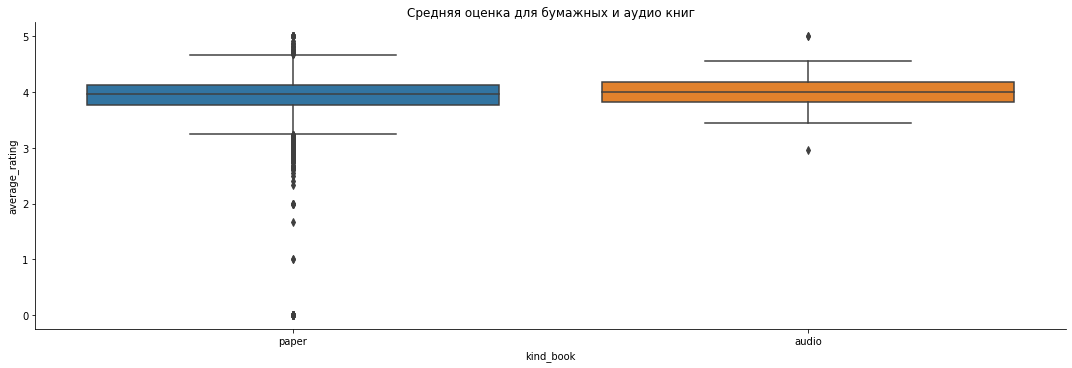

In [23]:
g = sns.catplot(data = db, x ='kind_book', y ='average_rating', kind = 'box', aspect = 3)
plt.pyplot.title('Средняя оценка для бумажных и аудио книг')

In [24]:
db = db.drop('kind_book', axis =1)
db = db[~db['publisher'].str.lower().str.contains('audio')]

In [25]:
db.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
publication_date,,,,,,,,,,,,
2006-09-16,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
2004-09-01,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.
2003-11-01,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic
2004-05-01,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.
2004-09-13,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic


In [26]:
db[db['num_pages'] < 10 ]['publisher'].value_counts()

Caedmon                              6
Tantor Media                         6
Grand Central Publishing             5
Random House Value Publishing        4
Mariner Books                        3
Little  Brown & Company              3
HarperFestival                       3
Recorded Books  Inc.                 3
Ivy Books                            2
HighBridge Company                   2
HarperCollins Publishers             2
Basic Books                          2
Hay House                            2
Listening Library                    2
Puffin                               2
Addison Wesley Publishing Company    1
Recorded Books                       1
Festival Books                       1
Schocken                             1
Fawcett Coventry                     1
Ballantine Books                     1
Gold Eagle                           1
Planeta Publishing                   1
Knopf                                1
Prentice Hall                        1
Turtleback Books         

In [27]:
db = db[db['num_pages'] > 10]

In [28]:
db.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10862 entries, 2006-09-16 to 2006-05-28
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              10862 non-null  int64         
 1   title               10862 non-null  object        
 2   authors             10862 non-null  object        
 3   average_rating      10862 non-null  float64       
 4   isbn                10862 non-null  object        
 5   isbn13              10862 non-null  object        
 6   language_code       10862 non-null  object        
 7   num_pages           10862 non-null  int64         
 8   ratings_count       10862 non-null  int64         
 9   text_reviews_count  10862 non-null  int64         
 10  publication_date    10862 non-null  datetime64[ns]
 11  publisher           10862 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 1.4+ MB


In [29]:
db.loc[ : , 'decade'] = 10 * (db.loc[ : , 'publication_date'].dt.year // 10)

In [30]:
db.loc[ : , 'quarter'] = db.loc[ : , 'publication_date'].dt.quarter

In [31]:
db.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,decade,quarter
publication_date,,,,,,,,,,,,,,
2006-09-16,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2000,3
2004-09-01,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2000,3
2003-11-01,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,2000,4
2004-05-01,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,2000,2
2004-09-13,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,2000,3


In [32]:
db[db['authors'].str.contains('/')]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,decade,quarter
publication_date,,,,,,,,,,,,,,
2006-09-16,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2000,3
2004-09-01,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2000,3
2004-05-01,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,2000,2
2004-09-13,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,2000,3
2002-10-01,35,The Lord of the Rings (The Lord of the Rings ...,J.R.R. Tolkien/Alan Lee,4.50,0618260587,9780618260584,en-US,1216,1618,140,2002-10-01,Houghton Mifflin Harcourt,2000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-08-15,45617,O Cavalo e o Seu Rapaz (As Crónicas de Nárnia ...,C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,3.92,9722330551,9789722330558,por,160,207,16,2003-08-15,Editorial Presença,2000,3
2003-04-08,45623,O Sobrinho do Mágico (As Crónicas de Nárnia #1),C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,4.04,9722329987,9789722329989,por,147,396,37,2003-04-08,Editorial Presença,2000,2
2004-09-01,45625,A Viagem do Caminheiro da Alvorada (As Crónica...,C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,4.09,9722331329,9789722331326,por,176,161,14,2004-09-01,Editorial Presença,2000,3


In [33]:
db['authors'] = db ['authors'].str.replace('/',',')
db['tra_co'] = np.where(db['authors'].str.contains(','), 1, 0)

In [34]:
db.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,decade,quarter,tra_co
publication_date,,,,,,,,,,,,,,,
2006-09-16,1,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling,Mary GrandPré",4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2000,3,1
2004-09-01,2,Harry Potter and the Order of the Phoenix (Har...,"J.K. Rowling,Mary GrandPré",4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2000,3,1
2003-11-01,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,2000,4,0
2004-05-01,5,Harry Potter and the Prisoner of Azkaban (Harr...,"J.K. Rowling,Mary GrandPré",4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,2000,2,1
2004-09-13,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,"J.K. Rowling,Mary GrandPré",4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,2000,3,1


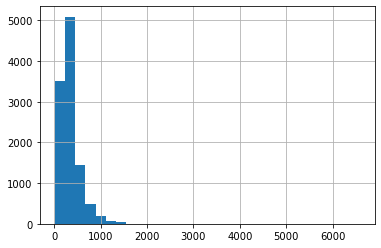

In [35]:
db['num_pages'].hist(bins=30)

In [36]:
db[db['num_pages'] > 1000]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,decade,quarter,tra_co
publication_date,,,,,,,,,,,,,,,
2004-09-13,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,"J.K. Rowling,Mary GrandPré",4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,2000,3,1
2005-09-12,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,2005-09-12,Scholastic,2000,3,0
2012-09-25,30,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.59,0345538374,9780345538376,eng,1728,101233,1550,2012-09-25,Ballantine Books,2010,3,0
2004-10-21,31,The Lord of the Rings (The Lord of the Rings ...,J.R.R. Tolkien,4.50,0618517650,9780618517657,eng,1184,1710,91,2004-10-21,Houghton Mifflin Harcourt,2000,4,0
2002-10-01,35,The Lord of the Rings (The Lord of the Rings ...,"J.R.R. Tolkien,Alan Lee",4.50,0618260587,9780618260584,en-US,1216,1618,140,2002-10-01,Houghton Mifflin Harcourt,2000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-12-02,42932,Whirlwind (Asian Saga #6),James Clavell,3.82,0340766182,9780340766187,eng,1231,5626,164,1999-12-02,Morrow,1990,4,0
2002-02-05,42986,War and Remembrance (The Henry Family #2),Herman Wouk,4.41,0316954993,9780316954990,eng,1042,29555,680,2002-02-05,Back Bay Books,2000,1,0
1998-11-15,43888,The Sword of Truth Boxed Set I: Wizard's Firs...,Terry Goodkind,4.29,0812575601,9780812575606,en-US,2480,4196,81,1998-11-15,Tor Books,1990,4,0


In [37]:
db['average_rating'].describe()

count    10862.000000
mean         3.933448
std          0.348318
min          0.000000
25%          3.770000
50%          3.960000
75%          4.130000
max          5.000000
Name: average_rating, dtype: float64

In [38]:
db[ (db['average_rating'] == 0) & (db['ratings_count'] > 0)]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,decade,quarter,tra_co
publication_date,,,,,,,,,,,,,,,


In [39]:
db[db['average_rating'] == 0]['average_rating'].count()

24

In [40]:
db = db[db['average_rating'] != 0]

In [41]:
db['average_rating'].min()

1.0

In [42]:
db.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,decade,quarter,tra_co
publication_date,,,,,,,,,,,,,,,
2006-09-16,1,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling,Mary GrandPré",4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2000,3,1
2004-09-01,2,Harry Potter and the Order of the Phoenix (Har...,"J.K. Rowling,Mary GrandPré",4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2000,3,1
2003-11-01,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,2000,4,0
2004-05-01,5,Harry Potter and the Prisoner of Azkaban (Harr...,"J.K. Rowling,Mary GrandPré",4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,2000,2,1
2004-09-13,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,"J.K. Rowling,Mary GrandPré",4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,2000,3,1


In [43]:
db = db.drop(['bookID','isbn','isbn13','publication_date'], axis = 1) # удалим признаки, которые больше не понадобятся
# имеются чиловые признаки num_pages или text_reviews_count, имеются категориальные признаки language_code, 
# имеются идентификационные признаки для каждой книги title, authors, publisher (скорее это не признаки)


In [45]:
db.to_csv('data/books_tidy_data.csv') # сохранение 